# Exercises shape moment and shear diagram hinged beam

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to show the interactive widgets!

In [1]:
import micropip
await micropip.install("ipympl")

ModuleNotFoundError: No module named 'micropip'

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
from matplotlib.patches import Arc,StepPatch

%matplotlib widget
%config InlineBackend.figure_formats = ['svg']

interactive(children=(FloatSlider(value=2.0, description='Location force x_F = ... (m)', layout=Layout(width='…

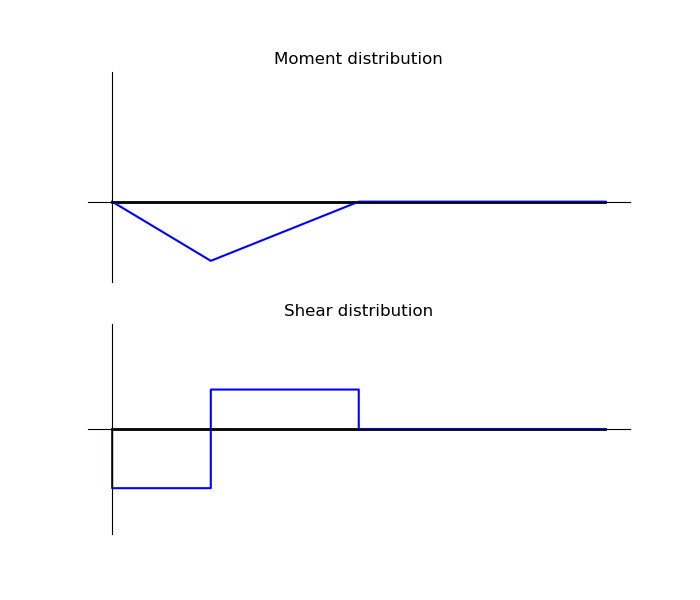

In [6]:
EI, x = sym.symbols('EI, x',real=True)

Av, Bv, Cv, phi_S = sym.symbols('Av, Bv, Cv, phi_S',real=True)
a = sym.symbols('a',real=True,positive=True)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')

L1 = 5
L2 = 5
EI = 5000

q = -Bv * sym.SingularityFunction(x,L1,-1) - Av * sym.SingularityFunction(x,0,-1) - Cv * sym.SingularityFunction(x,L1+L2,-1) + 1 * sym.SingularityFunction(x,a,-1)
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3 + phi_S * sym.SingularityFunction(x,L1 + L2/2,0)
w = sym.integrate(phi,x)+C4
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L1),0)
eq3 = sym.Eq(w.subs(x,L1+L2),0)
eq4 = sym.Eq(M.subs(x,0),0)
eq5 = sym.Eq(M.subs(x,L1+L2),0)
eq6 = sym.Eq(V.subs(x,-1),0)
eq7 = sym.Eq(V.subs(x,L1+L2+1),0)
eq8 = sym.Eq(M.subs(x,L1+L2/2),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8],[C1,C2,C3,C4,Av,Bv,Cv,phi_S])
V_sol = V.subs(sol)
V_subs = V_sol
V_numpy = sym.lambdify([a,x],V_sol.rewrite(sym.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol
M_numpy = sym.lambdify([a,x],M_sol.rewrite(sym.Piecewise))

fig, axs = plt.subplots(2, 1, figsize=(7, 6))
def func(a):
    x = 0
    if a < 5:
        x = np.append(x,np.linspace(0.0001,a-0.0001,2))
        x = np.append(x,np.linspace(a+0.0001,5-0.0001,2))
        x = np.append(x,np.linspace(5+0.0001,10,2))
    if a > 5:
        x = np.append(x,np.linspace(0.0001,5-0.0001,2))
        x = np.append(x,np.linspace(5+0.0001,a-0.0001,2))
        x = np.append(x,np.linspace(a+0.0001,10,2))
    x = np.append(x,10)
    axs[0].clear()  # Clear the existing plot
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,M_numpy(a,x),color='blue')
    #axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    #axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    axs[0].set_ylim(2,-3)
    title0 = 'Moment distribution'
    axs[0].set_title(title0)

    axs[1].clear()  # Clear the existing plot
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,V_numpy(a,x)*2,color='blue')
    #axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    #axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[1].invert_yaxis()
    axs[1].set_ylim(2,-2)
    title0 = 'Shear distribution'
    axs[1].set_title(title0)

    axs[0].set_yticks([])
    axs[0].set_xticks([])
    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')
    axs[0].spines['bottom'].set_position('zero')
    axs[0].spines['left'].set_position('zero')

    axs[1].set_yticks([])
    axs[1].set_xticks([])
    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_position('zero')

    plt.draw()  

    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.1, description="Location force x_F = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}));

interactive(children=(FloatSlider(value=0.0, description='Location start distributed load x_start = ... (m)', …

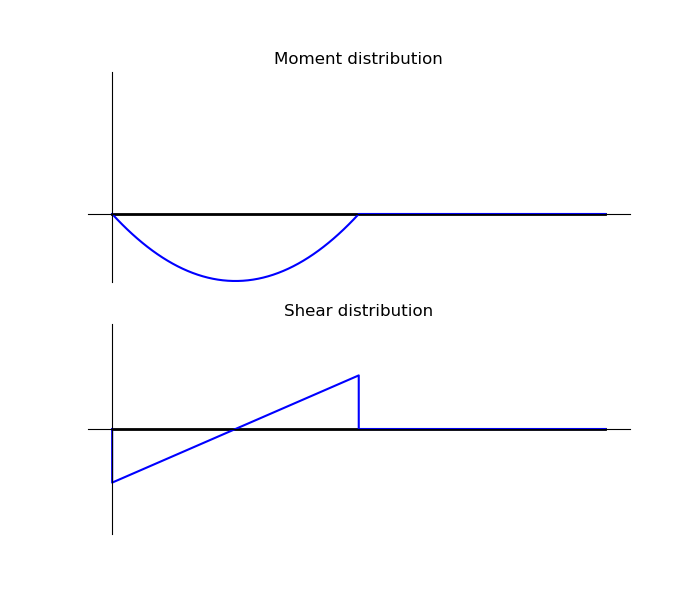

In [14]:
EI_new, x_new = sym.symbols('EI_new, x_new', real=True)
Av_new, Bv_new, Cv_new, phi_S_new = sym.symbols('Av_new, Bv_new, Cv_new, phi_S_new', real=True)
a_new, b_new = sym.symbols('a_new, b_new', real=True, positive=True)
C1_new, C2_new, C3_new, C4_new = sym.symbols('C1_new, C2_new, C3_new, C4_new')

L1_new = 5
L2_new = 5
EI_new = 5000

q_new = -Bv_new * sym.SingularityFunction(x_new, L1_new, -1) - Av_new * sym.SingularityFunction(x_new, 0, -1) - Cv_new * sym.SingularityFunction(x_new, L1_new + L2_new, -1) + sym.SingularityFunction(x_new, a_new, 0) / 2.3 - sym.SingularityFunction(x_new, a_new + b_new, 0) / 2.3
V_new = -sym.integrate(q_new, x_new) + C1_new
M_new = sym.integrate(V_new, x_new) + C2_new
kappa_new = M_new / EI_new
phi_new = sym.integrate(kappa_new, x_new) + C3_new + phi_S_new * sym.SingularityFunction(x_new, L1_new + L2_new / 2, 0)
w_new = sym.integrate(phi_new, x_new) + C4_new
eq1_new = sym.Eq(w_new.subs(x_new, 0), 0)
eq2_new = sym.Eq(w_new.subs(x_new, L1_new), 0)
eq3_new = sym.Eq(w_new.subs(x_new, L1_new + L2_new), 0)
eq4_new = sym.Eq(M_new.subs(x_new, 0), 0)
eq5_new = sym.Eq(M_new.subs(x_new, L1_new + L2_new), 0)
eq6_new = sym.Eq(V_new.subs(x_new, -1), 0)
eq7_new = sym.Eq(V_new.subs(x_new, L1_new + L2_new + 1), 0)
eq8_new = sym.Eq(M_new.subs(x_new, L1_new + L2_new / 2), 0)
sol_new = sym.solve([eq1_new, eq2_new, eq3_new, eq4_new, eq5_new, eq6_new, eq7_new, eq8_new], [C1_new, C2_new, C3_new, C4_new, Av_new, Bv_new, Cv_new, phi_S_new])
V_sol_new = V_new.subs(sol_new)
V_subs_new = V_sol_new
V_numpy_new = sym.lambdify([a_new, b_new, x_new], V_sol_new.rewrite(sym.Piecewise))
M_sol_new = M_new.subs(sol_new)
M_subs_new = M_sol_new
M_numpy_new = sym.lambdify([a_new, b_new, x_new], M_sol_new.rewrite(sym.Piecewise))

fig_new, axs_new = plt.subplots(2, 1, figsize=(7, 6))
def func_new(a_new, b_new):
    x_new = 0
    x_new = np.append(x_new, np.linspace(0.0001, 5 - 0.0001, 50))
    x_new = np.append(x_new, np.linspace(5 + 0.0001, 10, 50))
    x_new = np.append(x_new, 10)
    axs_new[0].clear()  # Clear the existing plot
    axs_new[0].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_new[0].grid()
    axs_new[0].axis('equal')
    axs_new[0].plot(x_new, M_numpy_new(a_new, b_new, x_new), color='blue')
    axs_new[0].invert_yaxis()
    axs_new[0].set_ylim(2, -3.5)
    title0_new = 'Moment distribution'
    axs_new[0].set_title(title0_new)

    axs_new[1].clear()  # Clear the existing plot
    axs_new[1].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_new[1].grid()
    axs_new[1].axis('equal')
    axs_new[1].plot(x_new, V_numpy_new(a_new, b_new, x_new), color='blue')
    axs_new[1].invert_yaxis()
    axs_new[1].set_ylim(2, -2)
    title1_new = 'Shear distribution'
    axs_new[1].set_title(title1_new)

    axs_new[0].set_yticks([])
    axs_new[0].set_xticks([])
    axs_new[0].spines['right'].set_color('none')
    axs_new[0].spines['top'].set_color('none')
    axs_new[0].spines['bottom'].set_position('zero')
    axs_new[0].spines['left'].set_position('zero')

    axs_new[1].set_yticks([])
    axs_new[1].set_xticks([])
    axs_new[1].spines['right'].set_color('none')
    axs_new[1].spines['top'].set_color('none')
    axs_new[1].spines['bottom'].set_position('zero')
    axs_new[1].spines['left'].set_position('zero')
    
interact(func_new, a_new=widgets.FloatSlider(min=0, max=10, value=0, step=0.1, description="Location start distributed load x_start = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}), 
         b_new=widgets.FloatSlider(min=0, max=10, value=5, step=0.1, description="Location end distributed load x_end = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}));


interactive(children=(FloatSlider(value=0.0, description='Location start distributed load x_start = ... (m)', …

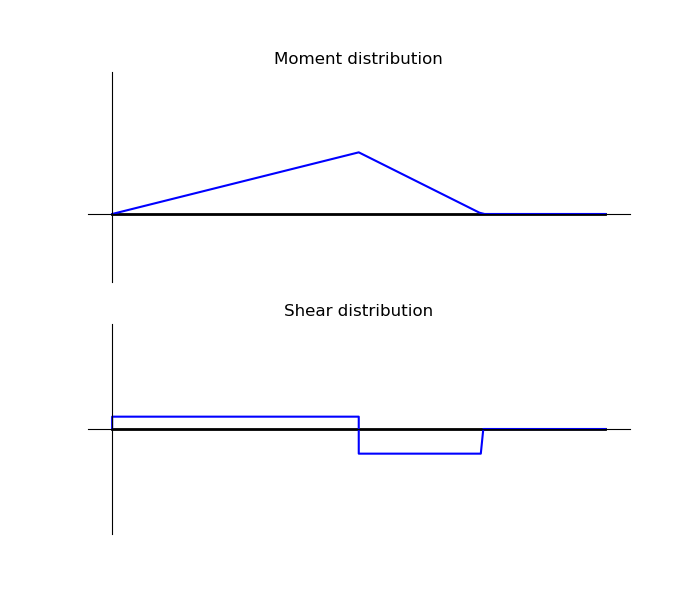

In [13]:
EI_alt, x_alt = sym.symbols('EI_alt, x_alt', real=True)
Av_alt, Bv_alt, Cv_alt, phi_S_alt = sym.symbols('Av_alt, Bv_alt, Cv_alt, phi_S_alt', real=True)
a_alt, b_alt, c_alt = sym.symbols('a_alt, b_alt, c_alt', real=True, positive=True)
C1_alt, C2_alt, C3_alt, C4_alt = sym.symbols('C1_alt, C2_alt, C3_alt, C4_alt')

L1_alt = 5
L2_alt = 5
EI_alt = 5000

q_alt = -Bv_alt * sym.SingularityFunction(x_alt, L1_alt, -1) - Av_alt * sym.SingularityFunction(x_alt, 0, -1) - Cv_alt * sym.SingularityFunction(x_alt, L1_alt + L2_alt, -1) + sym.SingularityFunction(x_alt, a_alt, 0) / 2.3 - sym.SingularityFunction(x_alt, a_alt + b_alt, 0) / 2.3 + 1 * sym.SingularityFunction(x_alt, c_alt, -1)
V_alt = -sym.integrate(q_alt, x_alt) + C1_alt
M_alt = sym.integrate(V_alt, x_alt) + C2_alt
kappa_alt = M_alt / EI_alt
phi_alt = sym.integrate(kappa_alt, x_alt) + C3_alt + phi_S_alt * sym.SingularityFunction(x_alt, L1_alt + L2_alt / 2, 0)
w_alt = sym.integrate(phi_alt, x_alt) + C4_alt
eq1_alt = sym.Eq(w_alt.subs(x_alt, 0), 0)
eq2_alt = sym.Eq(w_alt.subs(x_alt, L1_alt), 0)
eq3_alt = sym.Eq(w_alt.subs(x_alt, L1_alt + L2_alt), 0)
eq4_alt = sym.Eq(M_alt.subs(x_alt, 0), 0)
eq5_alt = sym.Eq(M_alt.subs(x_alt, L1_alt + L2_alt), 0)
eq6_alt = sym.Eq(V_alt.subs(x_alt, -1), 0)
eq7_alt = sym.Eq(V_alt.subs(x_alt, L1_alt + L2_alt + 1), 0)
eq8_alt = sym.Eq(M_alt.subs(x_alt, L1_alt + L2_alt / 2), 0)
sol_alt = sym.solve([eq1_alt, eq2_alt, eq3_alt, eq4_alt, eq5_alt, eq6_alt, eq7_alt, eq8_alt], [C1_alt, C2_alt, C3_alt, C4_alt, Av_alt, Bv_alt, Cv_alt, phi_S_alt])
V_sol_alt = V_alt.subs(sol_alt)
V_subs_alt = V_sol_alt
V_numpy_alt = sym.lambdify([a_alt, b_alt, c_alt, x_alt], V_sol_alt.rewrite(sym.Piecewise))
M_sol_alt = M_alt.subs(sol_alt)
M_subs_alt = M_sol_alt
M_numpy_alt = sym.lambdify([a_alt, b_alt, c_alt, x_alt], M_sol_alt.rewrite(sym.Piecewise))

fig_alt, axs_alt = plt.subplots(2, 1, figsize=(7, 6))
def func_alt(a_alt, b_alt, c_alt):
    x_alt = 0
    x_alt = np.append(x_alt, np.linspace(0.0001, 5 - 0.0001, 50))
    x_alt = np.append(x_alt, np.linspace(5 + 0.0001, 10, 50))
    x_alt = np.append(x_alt, 10)
    axs_alt[0].clear()  # Clear the existing plot
    axs_alt[0].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_alt[0].grid()
    axs_alt[0].axis('equal')
    axs_alt[0].plot(x_alt, M_numpy_alt(a_alt, b_alt, c_alt, x_alt) / 2, color='blue')
    axs_alt[0].invert_yaxis()
    axs_alt[0].set_ylim(2, -3.5)
    title0_alt = 'Moment distribution'
    axs_alt[0].set_title(title0_alt)

    x_alt = 0
    x_alt = np.append(x_alt, np.linspace(0.0001, 5 - 0.0001, 100))
    x_alt = np.append(x_alt, np.linspace(5 + 0.0001, 10, 100))
    x_alt = np.append(x_alt, 10)
    axs_alt[1].clear()  # Clear the existing plot
    axs_alt[1].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_alt[1].grid()
    axs_alt[1].axis('equal')
    axs_alt[1].plot(x_alt, V_numpy_alt(a_alt, b_alt, c_alt, x_alt) / 2, color='blue')
    axs_alt[1].invert_yaxis()
    axs_alt[1].set_ylim(2, -2)
    title1_alt = 'Shear distribution'
    axs_alt[1].set_title(title1_alt)

    axs_alt[0].set_yticks([])
    axs_alt[0].set_xticks([])
    axs_alt[0].spines['right'].set_color('none')
    axs_alt[0].spines['top'].set_color('none')
    axs_alt[0].spines['bottom'].set_position('zero')
    axs_alt[0].spines['left'].set_position('zero')

    axs_alt[1].set_yticks([])
    axs_alt[1].set_xticks([])
    axs_alt[1].spines['right'].set_color('none')
    axs_alt[1].spines['top'].set_color('none')
    axs_alt[1].spines['bottom'].set_position('zero')
    axs_alt[1].spines['left'].set_position('zero')

interact(func_alt, a_alt=widgets.FloatSlider(min=0, max=10, value=0, step=0.1, description="Location start distributed load x_start = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}), 
         b_alt=widgets.FloatSlider(min=0, max=10, value=0, step=0.1, description="Location end distributed load x_end = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}),
         c_alt=widgets.FloatSlider(min=0, max=10, value=7.5, step=0.1, description="Location force x_F = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}));
